In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,studying
0,female,group B,bachelor's degree,standard,72,72,74,0
1,female,group C,some college,standard,69,90,88,1
2,female,group B,master's degree,standard,90,95,93,0
3,male,group A,associate's degree,free/reduced,47,57,44,0
4,male,group C,some college,standard,76,78,75,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   math score                   1000 non-null   int64 
 5   reading score                1000 non-null   int64 
 6   writing score                1000 non-null   int64 
 7   studying                     1000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 62.6+ KB


In [3]:
data.describe()

,math score,reading score,writing score,studying
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,0.358000
std,15.16308,14.600192,15.195657,0.479652
min,0.00000,17.000000,10.000000,0.000000
25%,57.00000,59.000000,57.750000,0.000000
50%,66.00000,70.000000,69.000000,0.000000
75%,77.00000,79.000000,79.000000,1.000000
max,100.00000,100.000000,100.000000,1.000000


In [4]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'math score', 'reading score', 'writing score', 'studying'],
      dtype='object')

In [5]:
# codificar numericamente las columnas Object
encoder = OrdinalEncoder()

columns_to_encode = ['gender', 'race/ethnicity', 'parental level of education', 'lunch']

encoder.fit(data[columns_to_encode])

data[columns_to_encode] = encoder.transform(data[columns_to_encode])

data.head()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,studying
0,0.0,1.0,1.0,1.0,72,72,74,0
1,0.0,2.0,4.0,1.0,69,90,88,1
2,0.0,1.0,3.0,1.0,90,95,93,0
3,1.0,0.0,0.0,0.0,47,57,44,0
4,1.0,2.0,4.0,1.0,76,78,75,0


Columnas a considerar para eliminar: ['gender', 'race/ethnicity', 'parental level of education', 'lunch']
Pares de características altamente correlacionadas: [('math score', 'reading score'), ('math score', 'writing score'), ('reading score', 'math score'), ('reading score', 'writing score'), ('writing score', 'math score'), ('writing score', 'reading score')]


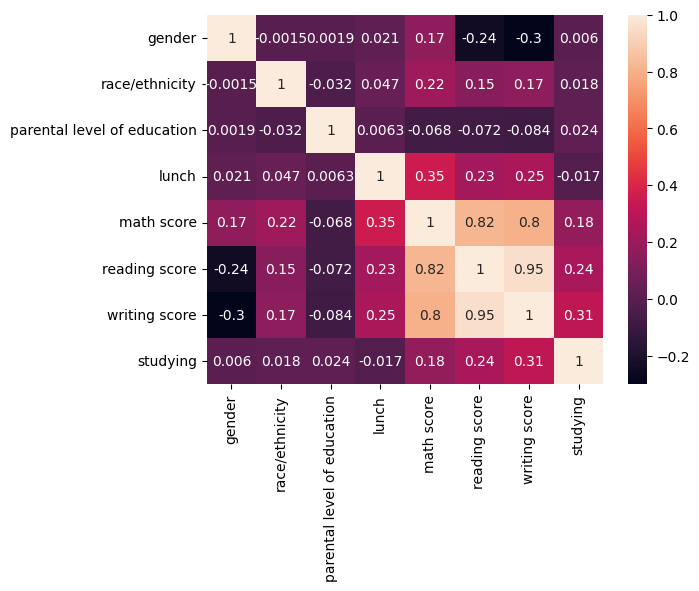

In [6]:
sns.heatmap(data.corr(), annot=True)
corr = data.corr()

# Correlación con el target
target_corr = corr['studying']  

# Mostrar características con baja correlación
low_corr_features = target_corr[abs(target_corr) < 0.1].index.tolist()
print("Columnas a considerar para eliminar:", low_corr_features)

# Verificar colinealidad
high_corr_pairs = [(i, j) for i in corr.columns for j in corr.columns if i != j and abs(corr[i][j]) > 0.8]
print("Pares de características altamente correlacionadas:", high_corr_pairs)

In [7]:
from sklearn.model_selection import train_test_split

# data = data.drop('gender', axis=1)  
# X = data[['race/ethnicity', 'parental level of education','lunch', 'math score', 'reading score', 'writing score']]

# data = data.drop('race/ethnicity', axis=1)  
# X = data[['gender', 'parental level of education','lunch', 'math score', 'reading score', 'writing score']]

# data = data.drop('parental level of education', axis=1)  
# X = data[['gender', 'race/ethnicity', 'lunch', 'math score', 'reading score', 'writing score']]

# data = data.drop('lunch', axis=1)  
# X = data[['gender', 'race/ethnicity', 'parental level of education', 'math score', 'reading score', 'writing score']]

X = data[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'math score', 'reading score', 'writing score']]
y = data[['studying']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(y_train.value_counts())  

studying
0           452
1           248
Name: count, dtype: int64


### Balancear los datos con Smote

In [8]:
from imblearn.over_sampling import SMOTE  

smote = SMOTE(random_state=42)  
X_resampled, y_resampled = smote.fit_resample(X_train, y_train) # type: ignore
print(y_resampled.value_counts())  

studying
0           452
1           452
Name: count, dtype: int64


In [9]:
from imblearn.under_sampling import RandomUnderSampler  

# Aplicar RandomUnderSampler  
undersampler = RandomUnderSampler(random_state=42)  
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)   # type: ignore

print(y_resampled.value_counts())

studying
0           248
1           248
Name: count, dtype: int64


In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_resampled, y_resampled)

c:\Users\HP 11na\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP 11na\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Metrics

In [11]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
log_reg_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
# report = pd.concat([log_reg_report], axis=1, keys=["Logistic Regression"])

log_reg_report

,precision,recall,f1-score,support
0,0.815951,0.700000,0.753541,190.00
1,0.583942,0.727273,0.647773,110.00
accuracy,0.710000,0.710000,0.710000,0.71
macro avg,0.699946,0.713636,0.700657,300.00
weighted avg,0.730881,0.710000,0.714760,300.00


In [12]:
confusion_matrix(y_test, y_pred)

array([[133,  57],
       [ 30,  80]], dtype=int64)

In [13]:
print(f"ROC Accuracy: {roc_auc_score(y_test, y_pred)}")

ROC Accuracy: 0.7136363636363636


In [14]:
new_student = pd.DataFrame({'gender': [0], 'race/ethnicity': [1], 'parental level of education': [1], 'lunch':[0], 'math score':[85], 'reading score':[93], 'writing score':[96]})

prediction = model.predict(new_student)

if prediction[0] == 0:
    print("The student will drop out of college")
else:
    print("The student will continue in the career")

The student will continue in the career
